# Task 3: Baseline Model Comparison (Neural Network)

In this notebook, you will train a simple Neural Network (MLP) to predict the `prior_hiring_decision` target variable. Compare its performance to the previous models.

In [2]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load Data
train_df = pd.read_csv('../data/train.csv')
val_df = pd.read_csv('../data/val.csv')
test_df = pd.read_csv('../data/test.csv')

print("Training Shape:", train_df.shape)
print("Validation Shape:", val_df.shape)
print("Test Shape:", test_df.shape)

Training Shape: (30000, 13)
Validation Shape: (10000, 13)
Test Shape: (10000, 13)


## Model Training & Evaluation
**TODO:** Implement your Neural Network (MLPClassifier) pipeline here. Pay attention to data scaling.

In [3]:
# TODO: Train Neural Network and Report Accuracy + Fairness Metrics
# Create Binary 'is_white' column for Fairness Evaluation (1 = White, 0 = Non-White)
import importlib
import utils
importlib.reload(utils)

from utils import preprocess_data, fairness_metrics  # since notebook is in src/, this is correct
data, clf = preprocess_data(train_df, val_df, test_df, MLPClassifier(hidden_layer_sizes=(50,30), max_iter=500))
X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
sensitive_val = data['sensitive_val']


Using Features: ['Age', 'Workclass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Hours_Per_Week', 'Sex', 'Place_Of_Birth', 'interview_score', 'cv_assessment_score']
Numerical: ['Age', 'Hours_Per_Week', 'interview_score', 'cv_assessment_score']
Categorical: ['Workclass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Sex', 'Place_Of_Birth']


In [4]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
print(y_pred)


[1 0 1 ... 0 1 0]


In [5]:
accuracy = accuracy_score(y_val, y_pred)
fairness_results, fairness_gaps = fairness_metrics(y_val, y_pred, sensitive_val, min_group_size=30)

print("Validation Accuracy:", accuracy)
for group, result in fairness_results.items():
    print(f"Group {group}")
    for metric, value in result.items():
        print(f"  {metric}: {value}")
for metric, gap in fairness_gaps.items():
    print(f"{metric} Gap: {gap}")

Validation Accuracy: 0.6528
Group 0
  n: 3756
  selection_rate_P(yhat=1|A): 0.3740681576144835
  TPR_P(yhat=1|Y=1,A): 0.5511171293161814
  FPR_P(yhat=1|Y=0,A): 0.2593242650285213
  TNR: 0.7406757349714788
  FNR: 0.44888287068381855
  TP: 814
  FP: 591
  TN: 1688
  FN: 663
Group 1
  n: 6244
  selection_rate_P(yhat=1|A): 0.5185778347213325
  TPR_P(yhat=1|Y=1,A): 0.6534296028880866
  FPR_P(yhat=1|Y=0,A): 0.36506849315068496
  TNR: 0.6349315068493151
  FNR: 0.34657039711191334
  TP: 2172
  FP: 1066
  TN: 1854
  FN: 1152
DP_gap_|P(yhat=1|A=1)-P(yhat=1|A=0)| Gap: 0.14450967710684898
EO_gap_|TPR(A=1)-TPR(A=0)| Gap: 0.1023124735719052
FPR_gap_|FPR(A=1)-FPR(A=0)| Gap: 0.10574422812216366
EOD_gap_max(TPR_gap,FPR_gap) Gap: 0.10574422812216366


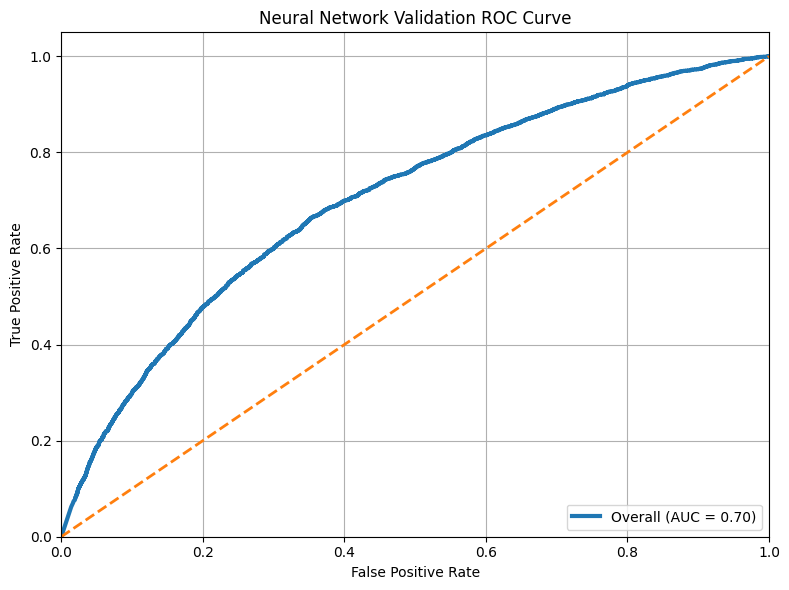

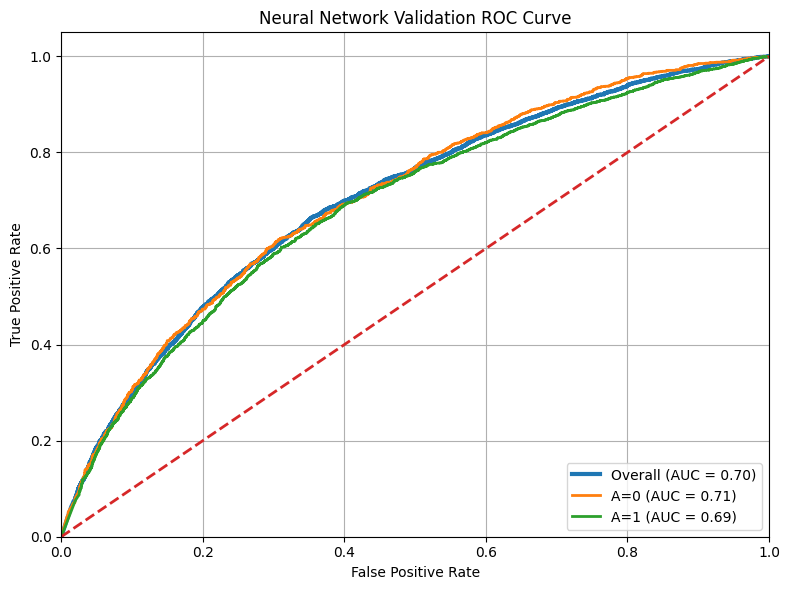

In [ ]:
importlib.reload(utils)
from utils import plot_roc_curve
y_pred_proba = clf.predict_proba(X_val)[:, 1]

plot_roc_curve(y_val, y_pred_proba, title="Neural Network Validation ROC Curve")
plot_roc_curve(y_val, y_pred_proba, sensitive_val, title="Neural Network Validation ROC Curve")
 